In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [7]:
df =pd.read_csv(r"C:\Users\VAIBHAV\Desktop\Data Science\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.rename(columns ={"caa":"ca",'thalachh':'thalach','restecg':'rest-ecg'}, inplace =True)

In [11]:
df.shape

(303, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest-ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
for column in df.columns:
 print("------ "+ column+ " ------")
 print(df[column].value_counts())

------ age ------
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
------ sex ------
sex
1    207
0     96
Name: count, dtype: int64
------ cp ------
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
------ trestbps ------
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104

In [17]:
print(df['ca'].value_counts())
df['ca'] =df['ca'].replace(4,np.NAN)
print(df['ca'].value_counts())
df['ca'] =df['ca'].fillna(df['ca'].median())
print(df['ca'].value_counts())


ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
ca
0.0    175
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


In [19]:
df.drop_duplicates()
df.shape

(303, 14)

[0.06925698 0.05908486 0.12071731 0.06075339 0.06227646 0.02021872
 0.03393555 0.09076129 0.10154044 0.0761739  0.06717011 0.1353629
 0.1027481 ]


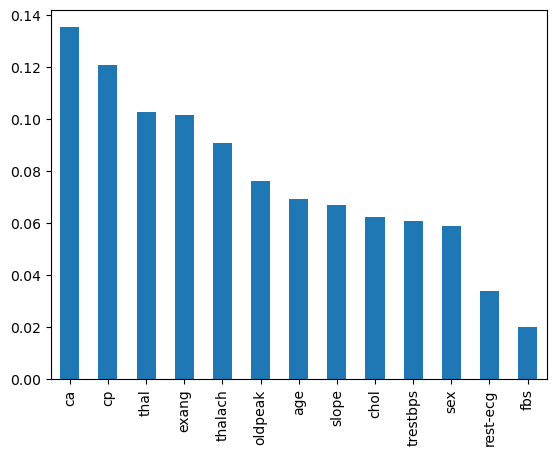

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'rest-ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [21]:
X_shape =df.iloc[:,0:13]
Y_shape =df['target']
from sklearn.ensemble import ExtraTreesClassifier
model =ExtraTreesClassifier()
model.fit(X_shape, Y_shape)
print(model.feature_importances_)
feat_importances =pd.Series(model.feature_importances_, index=X_shape.columns)
#show 13 columns of our fit
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()
print(list1)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'rest-ecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

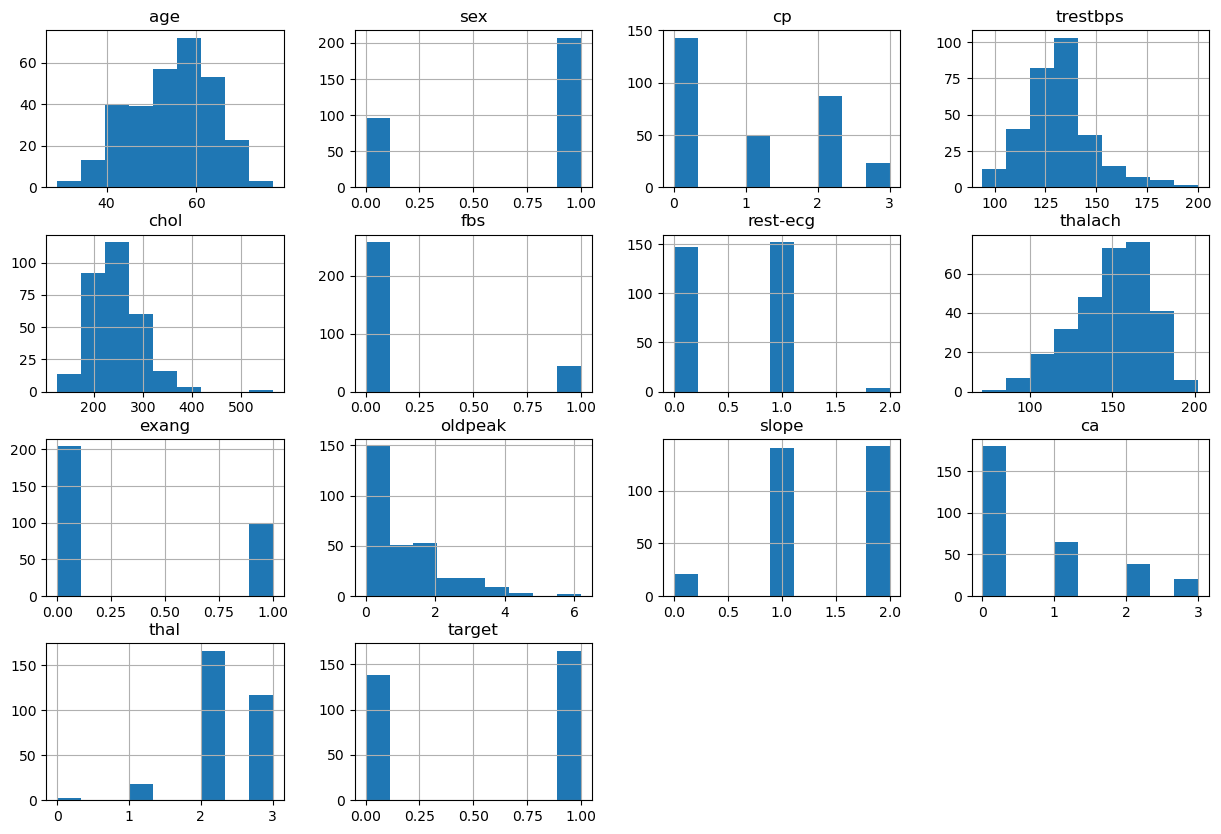

In [23]:
df.hist(figsize=(15,10), bins=9)

In [27]:
x=df[['age','sex','cp','trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal',	'target']]
x[:5]


,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,163,1,0.6,2,0.0,2,1


In [29]:
y=df['target'].values
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [31]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  ,  0.01544279, -0.69663055,  1.08733806, -2.27457861,
        -0.71113139, -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  1.63347147, -0.69663055,  2.12257273, -2.27457861,
        -0.71113139, -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453,  0.97751389, -0.69663055,  0.31091206,  0.97635214,
        -0.71113139, -0.51292188,  0.91452919],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  1.23989692, -0.69663055, -0.20670527,  0.97635214,
        -0.71113139, -0.51292188,  0.91452919],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.58393935,  1.43548113, -0.37924438,  0.97635214,
        -0.71113139, -0.51292188,  0.91452919]])

In [33]:
from sklearn.model_selection import train_test_split
X_train ,x_test , Y_train , y_test =train_test_split(x , y, test_size=0.4 , random_state=4)
print ('Train set:', X_train.shape, Y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (181, 13) (181,)
Test set: (122, 13) (122,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn import metrics
kn =10
Accuracy =np.zeros((kn-1))
for number in range(1,kn):
 neighbors =KNeighborsClassifier(n_neighbors = number)
 neighbors.fit(X_train,Y_train)
 yhat =neighbors.predict(x_test)
 Accuracy[number-1] =metrics.accuracy_score(y_test, yhat)

Accuracy

array([0.95081967, 0.91803279, 0.95081967, 0.94262295, 0.94262295,
       0.93442623, 0.94262295, 0.95081967, 0.95081967])

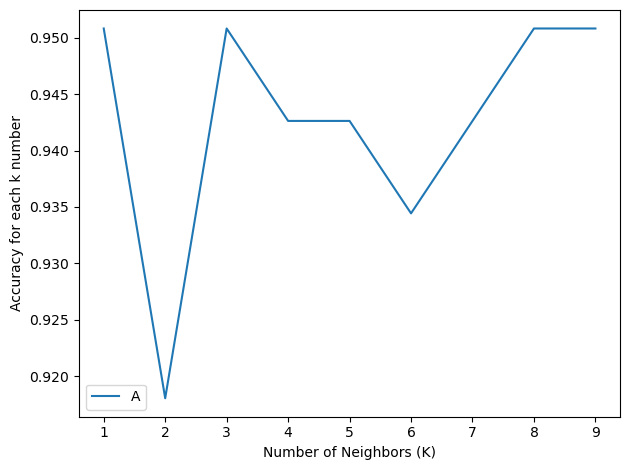

In [39]:
plt.plot(range(1,kn), Accuracy)
plt.legend('Accuracy')
plt.ylabel('Accuracy for each k number')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [43]:
max_k_neighbor =Accuracy.argmax()
neigh = KNeighborsClassifier(max_k_neighbor + 1)
neigh.fit(X_train,Y_train)
neigh


KNeighborsClassifier(n_neighbors=1)

In [45]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

In [49]:
acc_k7=metrics.accuracy_score(y_test, yhat)
acc_k7

0.9508196721311475

In [51]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.93      0.99      0.96        69

    accuracy                           0.95       122
   macro avg       0.96      0.95      0.95       122
weighted avg       0.95      0.95      0.95       122



In [55]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
         print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[68  1]
 [ 5 48]]


Confusion matrix, without normalization
[[68  1]
 [ 5 48]]


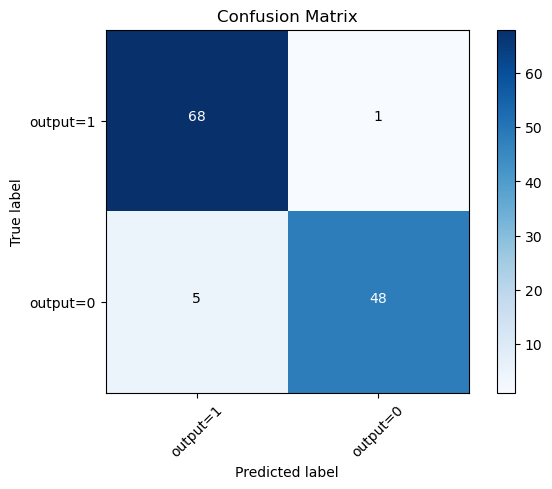

In [71]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False, title= 'Confusion Matrix')

In [73]:
from sklearn.ensemble import GradientBoostingClassifier


In [75]:
gradientB =GradientBoostingClassifier(n_estimators=100, max_depth =3)
gradientB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [77]:
yhat=gradientB.predict(x_test)
yhat

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [79]:
acc_GBC=metrics.accuracy_score(y_test, yhat)
acc_GBC

1.0

In [81]:
from sklearn.linear_model import LogisticRegression
logisticR =LogisticRegression(C=0.01)
logisticR.fit(X_train,Y_train)
logisticR

LogisticRegression(C=0.01)

In [83]:
yhat =logisticR.predict(x_test)
yhat

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [85]:
acc_lr=metrics.accuracy_score(y_test,yhat)
acc_lr

0.9590163934426229

In [87]:
#using svm model support vector machine
from sklearn import svm
sVm= svm.SVC(kernel='linear')

In [89]:
sVm.fit(X_train, Y_train)

SVC(kernel='linear')

In [91]:
yhat = sVm.predict(x_test)
yhat [0:5]


array([1, 0, 1, 1, 0], dtype=int64)

In [93]:
acc_sVm=metrics.accuracy_score(y_test,yhat)
acc_sVm

1.0

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[69  0]
 [ 0 53]]


Confusion matrix, without normalization
[[69  0]
 [ 0 53]]


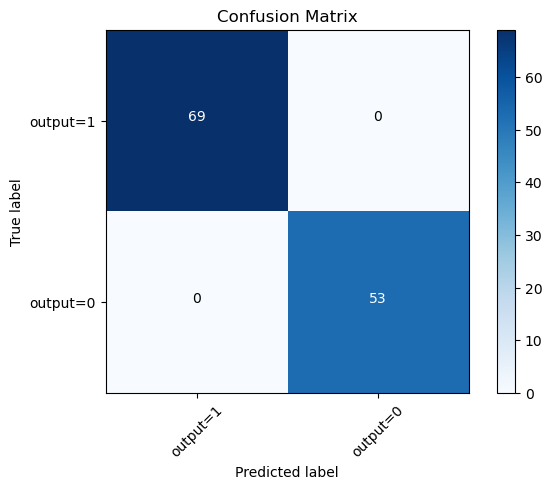

In [100]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False, title='Confusion Matrix')

In [102]:
from sklearn.tree import DecisionTreeClassifier


In [104]:
deTree =DecisionTreeClassifier(criterion="entropy")
deTree

DecisionTreeClassifier(criterion='entropy')

In [106]:
deTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [108]:
acc_deTree=metrics.accuracy_score(y_test,yhat)
acc_deTree

1.0

In [110]:
import pandas as pd #dataframes
import numpy as np #multidimentional array
import seaborn as sns #data visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import pickle
# using the dump() function to save the model using pickle
saved_model = pickle.dumps(deTree)
# loading that saved model
deTree_from_pickle = pickle.loads(saved_model)
# use this to make predictions
deTree_from_pickle.predict(x_test)


array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [116]:
deTree.predict([[52,1,0,125,212,0,1,168,0,1.0,3,0,1]])

array([1], dtype=int64)